# Collecting Tweets of Conservation Nonprofits

For my last data set share, I collected the text from mission, vision, and values statements of ten conservation nonprofits. After basic tokenization and analysis, I found what their most commonly used words were and created basic visualizations of the language use. 

I had found that when all mission, vision, and values text was combined, 'conservation' was the most commonly used word, followed by 'wildlife.'

I am interested in whether or not an organization's tweets will follow language patterns similar to that of their mission, vision, and values statements.

First I need to import tweepy and my API Keys.

In [1]:
import tweepy


import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

sw = stopwords.words("english")

from MD_API_Keys import api_key, api_key_secret, access_token, access_token_secret



The following authenticates the app:

In [2]:
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In order to see if everything is working properly, I am going to first try pulling 10 tweets from Backcountry Hunters and Anglers

In [3]:
username = 'Backcountry_H_A'
count = 10

tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)
tweets_list = [[tweet.text] for tweet in tweets]

tweets_list

[['@TristanDreilich @cpaws Welcome and we appreciate the support. We have work to do together @TristanDreilich!'],
 ['Our Kentucky Chapter doing their part! #PublicLandowner #AccessOurWaters Thank you @kyfisheriesne! https://t.co/320PTTxDoa'],
 ['Great recap of the #PublicLandsPackOut in @TheGearJunkie! https://t.co/0EuoQZTARv'],
 ['Check out the latst Podcast and Blast featuring Graham Zimmerman, a leading voice for @ProtectWinters! https://t.co/ysmkDd38fw'],
 ['Interested in developing and honing your #wildfood cooking skills? Join us for this 4-part Small-Game series with p… https://t.co/fCYykQADiF'],
 ['RT @alberta_bha: Join #albertabha on Oct 28 for a #knife sharpening webinar,  and  Q/A with the experts from @Knifewear! Registration in pr…'],
 ['We Hunt. We Fish. We #VotePublicLandsandWaters! Rep the message! Shop the collection here: https://t.co/vEy3uVqa6r https://t.co/0xhJKckju9'],
 ['"Wild places will never remain that way if protections placed on them aren’t recognized and r

##### The above code resulted in a list of just the text contained in each of the ten tweets. Next, I want to pull 500 tweets from each nonprofit and store them in a text file.

In [4]:
# Storing all twitter handles in a dictionary
user_dict = {'Backcountry_H_A': [],
             'RMEF': [],
             'BC_Club1887': [],
             'SierraClub': [],
             'OurOcean': [],
             'DucksUnlimited': [],
             'TroutUnlimited': [],
             'Defenders': [],
             'World_Wildlife': [],
             'nature_org': []}

In [5]:
#Creating a for loop to pull 100 tweets form each nonprofit and store them in a text file
for nonprofit in user_dict.keys():

    # Writing a text file to store tweets
    with open(f'{nonprofit}_tweets.txt','w', encoding='utf-8') as out_file:
        count = 500
        tweets = tweepy.Cursor(api.user_timeline,id=nonprofit).items(count)
        tweets_list = [[tweet.text] for tweet in tweets] 
        out_file.write(str(tweets_list))



ROCKY MOUNTAIN ELK FOUNDATION: @RMEF

Unsurprisingly, the most common word is 'elk,', followed by 'wildlife'. Other top words include 'game', 'hunters', 'hunting', and 'bull'

In [7]:
##Opening each text file and tokenizing
rmef = open('RMEF_tweets.txt', "r", encoding="Latin-1")
rmef_tweets = rmef.read() 
rmef_tokens = nltk.word_tokenize(rmef_tweets)

clean_rmef_tokens=[]

for tokens in rmef_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_rmef_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

rmef_common_words=Counter(clean_rmef_tokens).most_common(20)   
print(rmef_common_words)

[('elk', 162), ('wildlife', 45), ('a', 41), ('game', 39), ('hunters', 36), ('fish', 36), ('hunting', 32), ('rmef', 30), ('department', 27), ('bull', 26), ('colorado', 22), ('one', 22), ('wyoming', 22), ('deer', 22), ('here', 20), ('great', 19), ('hunt', 19), ('year', 18), ('conservation', 18), ('mountain', 17)]


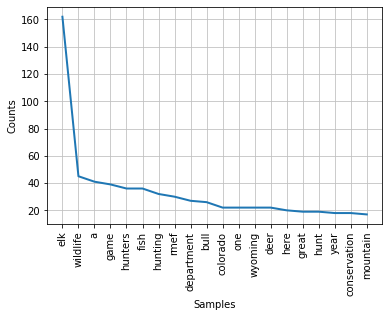

4332


In [8]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_rmef_tokens)
fdist.plot(20)
print(len(clean_rmef_tokens))

Backcountry Hunters and Anglers: @Backcountry_H_A

I found the common words in BHA tweets to be really interesting! They include 'public', 'act', 'land', 'thank', and 'conservation'. I also found it timely that 'great' 'american' 'outdoors', and 'act' were all in the top words. 

In [9]:
##Opening each text file and tokenizing
bha = open('Backcountry_H_A_tweets.txt', "r", encoding="Latin-1")
tweets_mission = bha.read() 
bha_tokens = nltk.word_tokenize(tweets_mission)

clean_bha_tokens=[]

for tokens in bha_tokens: ##For each token
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_bha_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

bha_common_words=Counter(clean_bha_tokens).most_common(20)   
print(bha_common_words)

[('public', 80), ('act', 76), ('land', 70), ('thank', 59), ('supporting', 59), ('great', 55), ('american', 54), ('support', 50), ('outdoors', 49), ('water', 46), ('across', 44), ('lands', 42), ('conservation', 41), ('funding', 41), ('country', 34), ('we', 33), ('full', 33), ('senate', 31), ('the', 30), ('bha', 30)]


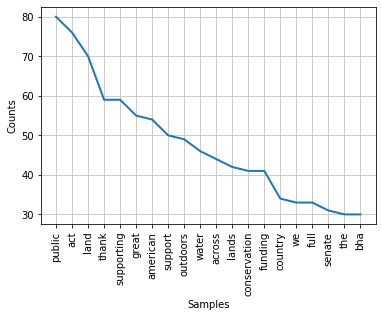

4609


In [10]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_bha_tokens)
fdist.plot(20)
print(len(clean_bha_tokens))

Boone and Crockett Club: @BC_Club1887

'Hunting' and 'conservation' were among the top words by far. These two words had a massive count compared to other common words. Other common words included 'fairchase' and the organization's name.

In [11]:
##Opening each text file and tokenizing
crockett = open('BC_Club1887_tweets.txt', "r", encoding="Latin-1")
crockett_tweets = crockett.read() 
crockett_tokens = nltk.word_tokenize(crockett_tweets)

clean_crockett_tokens=[]

for tokens in crockett_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_crockett_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

crockett_common_words=Counter(clean_crockett_tokens).most_common(20)   
print(crockett_common_words)

[('hunting', 212), ('conservation', 168), ('crockett', 97), ('amp', 78), ('fairchase', 75), ('in', 73), ('field', 73), ('b', 64), ('c', 63), ('boone', 24), ('big', 23), ('game', 21), ('save', 21), ('wildlife', 20), ('roosevelt', 19), ('book', 19), ('day', 18), ('offer', 18), ('rt', 17), ('new', 16)]


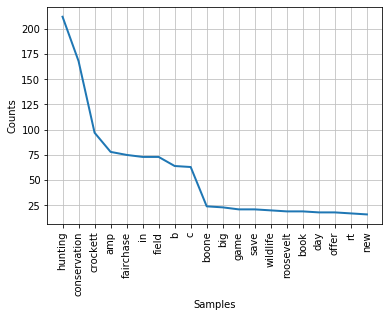

3345


In [12]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_crockett_tokens)
fdist.plot(20)
print(len(clean_crockett_tokens))

SIERRA CLUB: @SierraClub
The Sierra Club really stood out because its most common word in tweets was 'trump'. Also in the list of common words was 'donald'. 'Climate' was second behind 'Trump'. Other interesting words included 'committee', 'resident', and 'calls'

In [13]:
##Opening each text file and tokenizing
sierra = open('SierraClub_tweets.txt', "r", encoding="Latin-1")
tweets_mission = sierra.read() 
sierra_tokens = nltk.word_tokenize(tweets_mission)

clean_sierra_tokens=[]

for tokens in sierra_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_sierra_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

sierra_common_words=Counter(clean_sierra_tokens).most_common(20)   
print(sierra_common_words)

[('trump', 67), ('climate', 57), ('club', 48), ('sierra', 47), ('the', 44), ('amp', 42), ('committee', 38), ('environmental', 30), ('rt', 30), ('political', 28), ('we', 28), ('make', 27), ('vote', 27), ('donald', 26), ('join', 24), ('calls', 24), ('people', 24), ('a', 23), ('volunteers', 23), ('president', 22)]


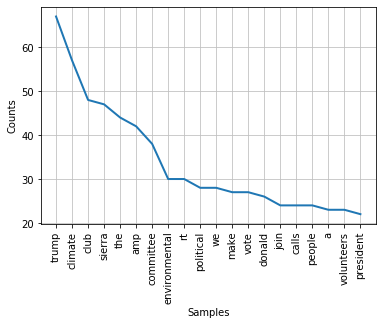

5129


In [14]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_sierra_tokens)
fdist.plot(20)
print(len(clean_sierra_tokens))

THE OCEAN CONSERVANCY: @OurOcean

Most common words included 'ocean', 'sea', 'know', 'one', 'ourocean', and 'climate'

In [15]:
##Opening each text file and tokenizing
ocean = open('OurOcean_tweets.txt', "r", encoding="Latin-1")
tweets_mission = ocean.read() 
ocean_tokens = nltk.word_tokenize(tweets_mission)

clean_ocean_tokens=[]

for tokens in ocean_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_ocean_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

ocean_common_words=Counter(clean_ocean_tokens).most_common(20)   
print(ocean_common_words)

[('ocean', 86), ('sea', 34), ('know', 31), ('one', 27), ('ourocean', 26), ('amp', 25), ('us', 25), ('new', 24), ('climate', 23), ('the', 20), ('today', 19), ('help', 18), ('we', 18), ('sharks', 17), ('learn', 16), ('join', 16), ('change', 15), ('communities', 15), ('get', 14), ('day', 14)]


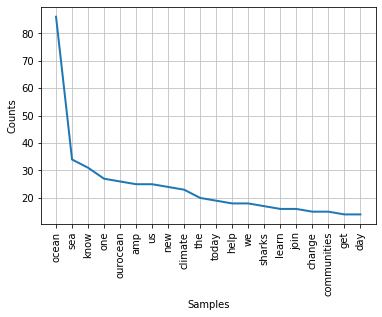

4233


In [16]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_ocean_tokens)
fdist.plot(20)
print(len(clean_ocean_tokens))

DUCKS UNLIMITED: @DucksUnlimited

The top two most used token for Ducks Unlimited was their organization name as 'ducksunlimited' and 'du'. Other important words include 'waterfowl', 'hunting', and 'conservation'

In [17]:
##Opening each text file and tokenizing
ducks = open('DucksUnlimited_tweets.txt', "r", encoding="Latin-1")
tweets_mission = ducks.read() 
ducks_tokens = nltk.word_tokenize(tweets_mission)

clean_ducks_tokens=[]

for tokens in ducks_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_ducks_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

ducks_common_words=Counter(clean_ducks_tokens).most_common(20)   
print(ducks_common_words)

[('ducksunlimited', 104), ('waterfowl', 73), ('du', 73), ('amp', 60), ('hunting', 54), ('conservation', 46), ('ducks', 40), ('duck', 39), ('the', 36), ('new', 32), ('great', 29), ('season', 29), ('wetlands', 27), ('alert', 25), ('national', 25), ('virtual', 25), ('habitat', 24), ('unlimited', 24), ('hunters', 22), ('teal', 20)]


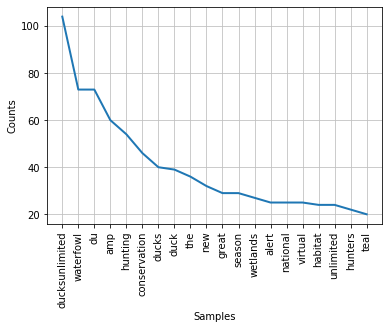

4715


In [18]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_ducks_tokens)
fdist.plot(20)
print(len(clean_ducks_tokens))

TROUT UNLIMITED: @TroutUnlimited

The organization's abbreviation, 'tu' is the most used token. Other significant words include 'trout', 'new', 'fishing', 'river', and 'fly'

In [19]:
##Opening each text file and tokenizing
trout = open('TroutUnlimited_tweets.txt', "r", encoding="Latin-1")
trout_tweets = trout.read() 
trout_tokens = nltk.word_tokenize(trout_tweets)

clean_trout_tokens=[]

for tokens in trout_tokens: ##For each token 
  
    if tokens not in sw and tokens.isalpha() and tokens != 'https':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_trout_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

trout_common_words=Counter(clean_trout_tokens).most_common(20)   
print(trout_common_words)

[('tu', 114), ('trout', 63), ('new', 42), ('fishing', 39), ('check', 35), ('us', 34), ('we', 32), ('river', 32), ('fly', 29), ('salmon', 28), ('the', 28), ('a', 24), ('work', 23), ('fish', 23), ('great', 22), ('water', 21), ('anglers', 19), ('time', 18), ('keep', 18), ('get', 18)]


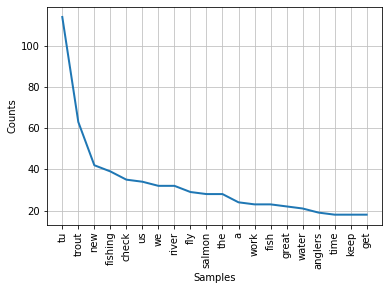

4564


In [20]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_trout_tokens)
fdist.plot(20)
print(len(clean_trout_tokens))

DEFENDERS OF WILDLIFE: @Defenders

Most common words included 'wildlife', 'species', 'habitat', 'protect', 'wolves', and 'conservation'

In [21]:
##Opening each text file and tokenizing
defenders = open('Defenders_tweets.txt', "r", encoding="Latin-1")
defenders_tweets = defenders.read() 
defenders_tokens = nltk.word_tokenize(defenders_tweets)

clean_defenders_tokens=[]

for tokens in defenders_tokens: ##For each token 
  #'amp' was by far the most common word, so I removed it from the list
    if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_defenders_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

defenders_common_words=Counter(clean_defenders_tokens).most_common(20)   
print(defenders_common_words)

[('wildlife', 69), ('species', 46), ('habitat', 46), ('the', 40), ('protect', 36), ('us', 35), ('wolves', 32), ('conservation', 31), ('land', 23), ('we', 22), ('new', 21), ('administration', 20), ('years', 19), ('news', 19), ('today', 18), ('service', 18), ('endangered', 17), ('week', 17), ('work', 17), ('it', 15)]


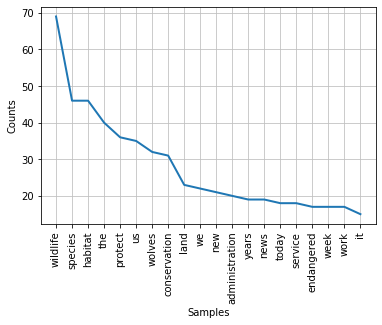

4620


In [22]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_defenders_tokens)
fdist.plot(20)
print(len(clean_defenders_tokens))

WORLD WILDLIFE FEDERATION: @World_Wildlife

The most common word was 'us', which in the text files was in the context of the country 'US' or 'us' as the organization referring to themselves. Other common words include 'wwf', 'wildlife', 'nature', 'art', 'people'

In [23]:
##Opening each text file and tokenizing
wwf = open('World_Wildlife_tweets.txt', "r", encoding="Latin-1")
wwf_tweets = wwf.read() 
wwf_tokens = nltk.word_tokenize(wwf_tweets)

clean_wwf_tokens=[]

for tokens in wwf_tokens: ##For each token 
  #'amp' was by far the most common word, so I removed it from the list
    if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_wwf_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

wwf_common_words=Counter(clean_wwf_tokens).most_common(20)   
print(wwf_common_words)

[('us', 59), ('wwf', 51), ('wildlife', 43), ('this', 42), ('nature', 35), ('new', 33), ('art', 33), ('people', 32), ('the', 32), ('world', 30), ('climate', 29), ('conservation', 28), ('one', 28), ('global', 27), ('help', 27), ('know', 26), ('we', 26), ('food', 25), ('issues', 25), ('great', 25)]


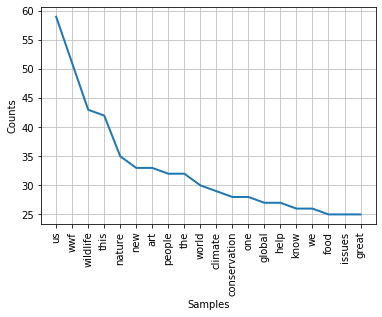

4923


In [24]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_wwf_tokens)
fdist.plot(20)
print(len(clean_wwf_tokens))

THE NATURE CONSERVANCY: @nature_org

THe most common words included 'nature', 'new', 'us', 'world,' 'we', 'climate', 'future', and 'food'

In [25]:
##Opening each text file and tokenizing
nature = open('nature_org_tweets.txt', "r", encoding="Latin-1")
nature_tweets = nature.read() 
nature_tokens = nltk.word_tokenize(nature_tweets)

clean_nature_tokens=[]

for tokens in nature_tokens: ##For each token 
  #'amp' was by far the most common word, so I removed it from the list
    if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp':  ##If the token is not within object sw, is an alphabetical character, and is not 'https'
        clean_nature_tokens.append(tokens.lower()) ##add to empty list called and wrap in lowercase

nature_common_words=Counter(clean_nature_tokens).most_common(20)   
print(nature_common_words)

[('nature', 104), ('new', 51), ('us', 46), ('world', 44), ('climate', 36), ('we', 36), ('the', 34), ('future', 31), ('food', 27), ('a', 27), ('people', 26), ('natural', 25), ('energy', 24), ('protect', 23), ('clean', 23), ('planet', 23), ('jenmorrisnature', 22), ('join', 22), ('need', 22), ('like', 22)]


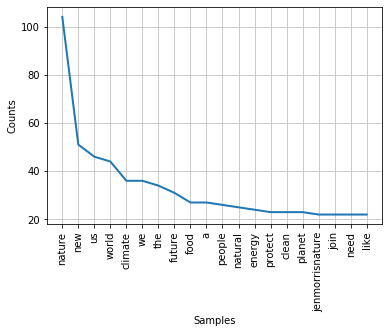

4720


In [26]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_nature_tokens)
fdist.plot(20)
print(len(clean_nature_tokens))

Now I will combine all the tokens so I can see the most common token out of all the tweets.

In [27]:
 #Create frequency histogram of 20 most common words and print summary of activity 

combined_common_words= clean_nature_tokens + clean_defenders_tokens + clean_bha_tokens + clean_rmef_tokens + clean_ocean_tokens + clean_crockett_tokens + clean_ducks_tokens + clean_trout_tokens + clean_wwf_tokens + clean_sierra_tokens

#How many tokens are there total?
print(len(combined_common_words))

45190


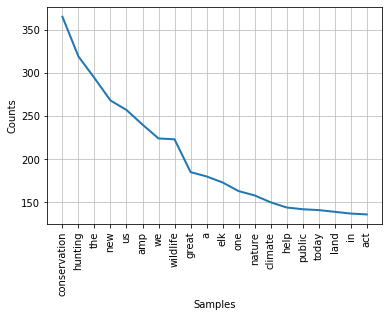

In [28]:
##Plotting combined list of words
fdist=FreqDist(combined_common_words)


fdist.plot(20)


Interestingly, the most common word used in all tweets was 'conservation', which was also the result of the mission, vision, and values basic analysis. 'hunting' was the other most commonly used word, and that was more likely the result of a biased selection of organizations. 

As a reminder, below is the graph of the most common words in mission, vision, and values statements of the ten nonprofit organizations.

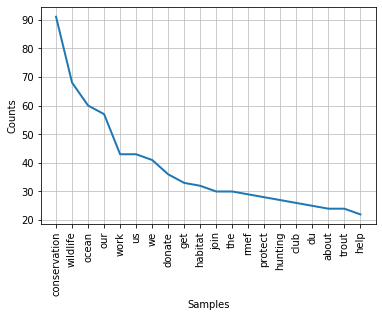